In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

# Исследование данных о продажах компьютерных игр

___Цель работы___: Изучение закономерностей опредляющих успешность продаж компьютерных игр. Необходимо провести предобработку имеющихся данных. Провести исследование и выявить перспективные платформы. Определить влияние отзывов пользователей и критиков. Составить портерты пользователей в зависимости от региона. В заключении следует подтвердить или опровергнуть гипотезы.\
\
___План выполнения работы___:
+ Загрузить датасет и изучить общую информацию \
\
__Этап предобработки__ 

+ Редактирование названия столбцов
+ Поиск и удаление пропусков
+ Устаранение дубликатов
+ Формирования столбца суммарной продажи \
\
__Этап исследовательского анализа__
+ Изучение количества игр по годам 
+ Выделение топ-7 платформ по продажам
+ Определение актуального периода
+ Выявление лидеров продаж для актуального периода
+ Изучение влияния отзывов пользователей и критиков
+ Определение прибыльных жанров для актуального периода
+ Составление портретов пользователей по регионам продаж и визуализация результатов \

 __Этап подтвержения гипотез__ 

 __Общий вывод по проведённой работе__




## Изучение общей информации о данных

### Загрузка датасета

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


___Вывод по данным___: Стобец с оценками пользователей стоит перевести в численный формат. Стобец с годами релиза - в целочисленный.

## Предобработка данных

### Изменение название столбцов (замена больших букв на строчные)

In [5]:
data.columns = data.columns.str.lower()

### Работа с пропусками

In [6]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Строки с пропусками в столбце "год релиза" предлагаю выбросить, так как это критически важный параметр для последующего анализа. Заполнить пропуски чем-то тут невозможно. Остальньные пропуски стоит оставить в покое. 

In [9]:
data = data.dropna(subset=['year_of_release'])
data = data.dropna(subset=['name'])
data = data.dropna(subset=['genre'])

In [10]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

___Ответ___: Оценки могли быть просто не добавлены в датасете. ESRB рейтинг к тому же, распространён далеко не во всех странах.

### Изменение типов данных

Заменим тип переменной в столбце с оценками пользователей, чтобы они соответствовали типу в столбце с оценками критиков. Часть значений пришлось оставить как NaN ( в том числе значения tbd)

In [11]:
#data['year_of_release']=data['year_of_release'].astype(int,errors='ignore')
data['user_score'] = pd.to_numeric(data['user_score'],errors='coerce')
data['year_of_release'] =data['year_of_release'].astype(int)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Удаление дубликатов

Приведение данных к нижнему регистру:

In [13]:
data['name'] = data['name'].str.lower()
data['platform'] = data['platform'].str.lower()

In [14]:
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'],keep='first')

In [15]:
data.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

0

### Добавление стоблца суммарной продажи

In [16]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] +data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Устранение аномалии DS:


In [17]:
data[(data.platform == 'ds') & (data.year_of_release == 1985 )] 


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,strongest tokyo university shogi ds,ds,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


In [18]:
data = data.drop(index = 15957 )

___Вывод___: Проведена предварительная работа с данными. Изменены названия столбцов, проведена работа с пропусками. Найдены и удалены дубликаты. Добавлен столбец с суммарной продаже по регионам.

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16442 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16442 non-null  object 
 1   platform         16442 non-null  object 
 2   year_of_release  16442 non-null  int64  
 3   genre            16442 non-null  object 
 4   na_sales         16442 non-null  float64
 5   eu_sales         16442 non-null  float64
 6   jp_sales         16442 non-null  float64
 7   other_sales      16442 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
 11  total_sales      16442 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


## Исследовательский анализ данных

### Количество игр,выпущенных в разные годы

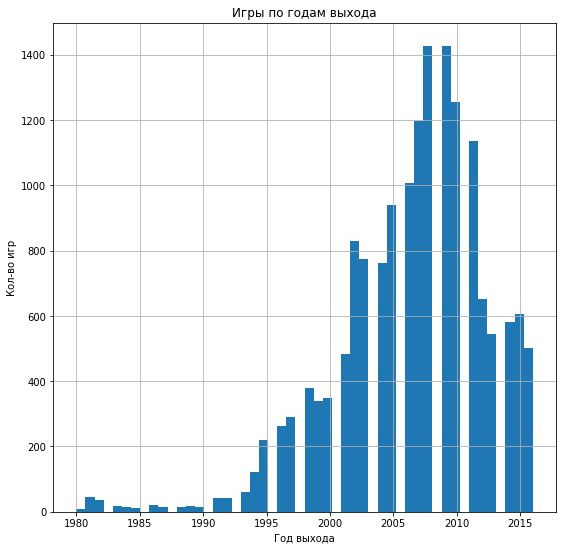

In [20]:
plt.title('Игры по годам выхода')
plt.xlabel('Год выхода')
plt.ylabel('Кол-во игр')
pd.Series(data['year_of_release']).hist(bins=50,figsize=(9,9));

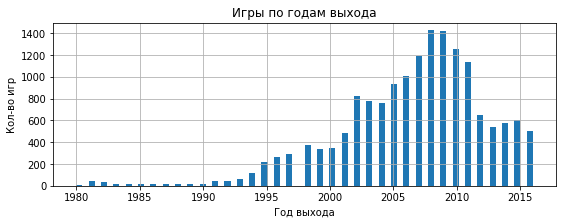

In [21]:
plt.title('Игры по годам выхода')
plt.xlabel('Год выхода')
plt.ylabel('Кол-во игр')
pd.Series(data['year_of_release']).hist(bins=37*2,figsize=(9,3));

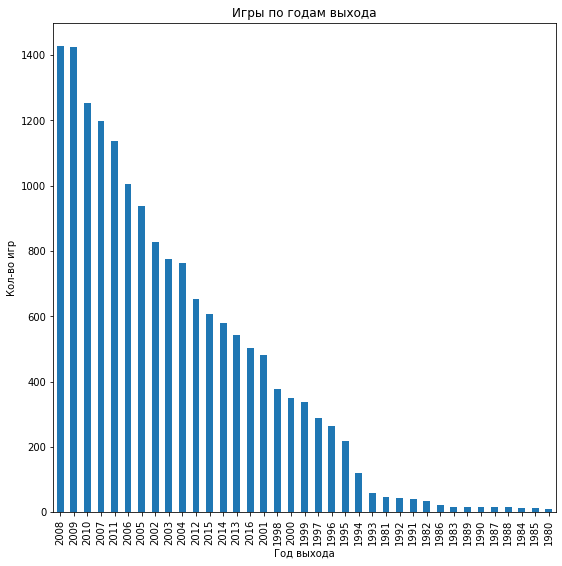

In [22]:
data['year_of_release'].value_counts() \
.plot(kind='bar',title='Игры по годам выхода',xlabel='Год выхода',ylabel='Кол-во игр',figsize=(9,9));

___Вывод___: Можно увидеть что максимум игр пришёл на 2008 и 2009 годы. Исходя из задания на проект, рассматривать игры выпущенные раньше 2010 не имеет большого смысла. Игры выпущенные в прошлом веке нет смысла учитывать вообще.

### Выделение топ-7 платформ по продажам

In [23]:
data.pivot_table(index='platform',values='total_sales',aggfunc='sum') \
.sort_values(by='total_sales',ascending=False).head(7)

,total_sales
platform,
ps2,1233.56
x360,961.24
ps3,931.33
wii,891.18
ds,802.76
ps,727.58
ps4,314.14


In [24]:
top_platform = ['ps2','x360','ps3','wii','ds','ps','ps4']

In [95]:
top_list = pd.pivot_table(data.loc[data['platform'].isin(top_platform)],\
                      index='year_of_release',columns='platform',values='total_sales',aggfunc='sum')
top_list

platform,ds,ps,ps2,ps3,ps4,wii,x360
year_of_release,,,,,,,
1994,NaN,6.03,NaN,NaN,NaN,NaN,NaN
1995,NaN,35.96,NaN,NaN,NaN,NaN,NaN
1996,NaN,94.70,NaN,NaN,NaN,NaN,NaN
1997,NaN,136.17,NaN,NaN,NaN,NaN,NaN
1998,NaN,169.49,NaN,NaN,NaN,NaN,NaN
1999,NaN,144.53,NaN,NaN,NaN,NaN,NaN
2000,NaN,96.37,39.17,NaN,NaN,NaN,NaN
2001,NaN,35.59,166.43,NaN,NaN,NaN,NaN
2002,NaN,6.67,205.38,NaN,NaN,NaN,NaN


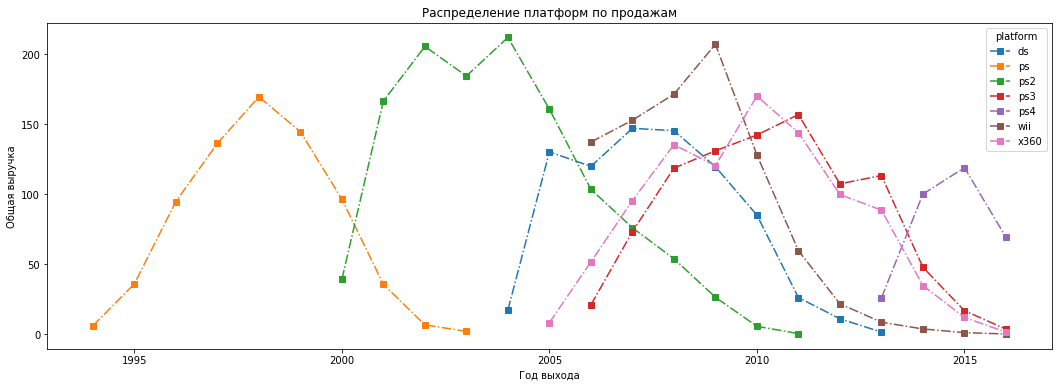

In [26]:
top_list.plot(figsize=(18,6),ls = '-.',marker='s');

plt.title('Распределение платформ по продажам')
plt.xlabel('Год выхода')
plt.ylabel('Общая выручка')
plt.show()

___Вывод по графикам___: Можно заметить что цикл жизни для консолей не всегда одинаков. PS 2 был очень успешен для своего времени и по данному периоду занимает первое место по продажам но на 2016 год уже является сильно устаревшим. Считаю, что есть жизненный цикл в среднем стоит брать за 7 лет.

### Выбор актуального периода

Для формирования прогнозов на 2017 год считают разумным взять период 2010-2016:

In [27]:
data['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

In [28]:
data_period =data.query('year_of_release >= 2013')

In [29]:
data_period.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,grand theft auto v,x360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,call of duty: black ops 3,ps4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,pokemon x/pokemon y,3ds,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,grand theft auto v,ps4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


### Лидеры продаж для выбранного периода 

In [30]:
data_period.pivot_table(index='platform',values='total_sales',aggfunc='sum') \
.sort_values(by='total_sales',ascending=False).head(7)

,total_sales
platform,
ps4,314.14
ps3,181.43
xone,159.32
3ds,143.25
x360,136.80
wiiu,64.63
pc,39.43


In [31]:
top_platform_per = ['x360','ps3','wiiu','pc','xone','ps4','3ds']

In [32]:
top_list_per = pd.pivot_table(data_period.loc[data['platform'].isin(top_platform_per)],\
                      index='year_of_release',columns='platform',values='total_sales',aggfunc='sum')

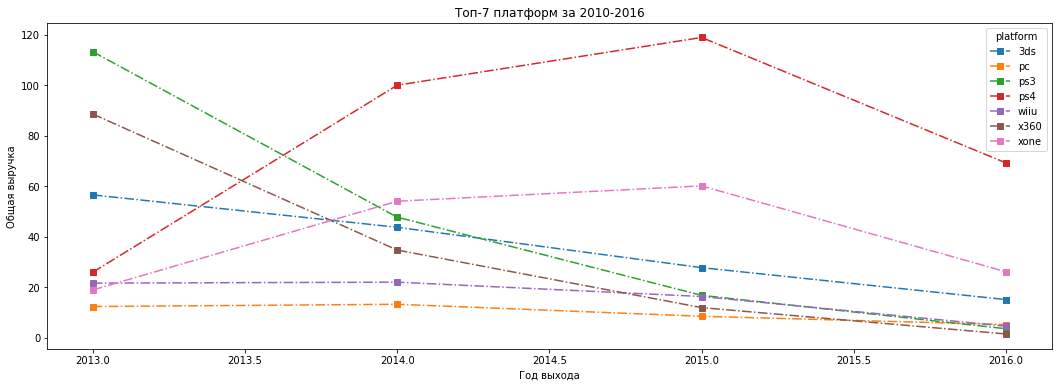

In [33]:
top_list_per.plot(figsize=(18,6),ls = '-.',marker='s');
plt.title('Топ-7 платформ за 2010-2016')
plt.xlabel('Год выхода')
plt.ylabel('Общая выручка')
plt.show()

___Пояснение___: По данным и по личным наблюдениям из реальной жизни стоит выделить PS4,Xone и 3Ds

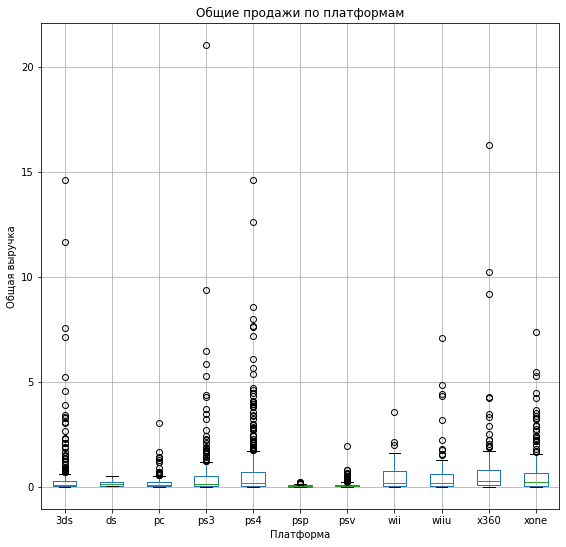

In [34]:
platform_boxplot = data_period.boxplot(figsize=(9,9),column='total_sales',by='platform')
platform_boxplot_title= 'Общие продажи по платформам'
plt.title(platform_boxplot_title)
plt.suptitle('')
plt.xlabel('Платформа')
plt.ylabel('Общая выручка')
plt.show()

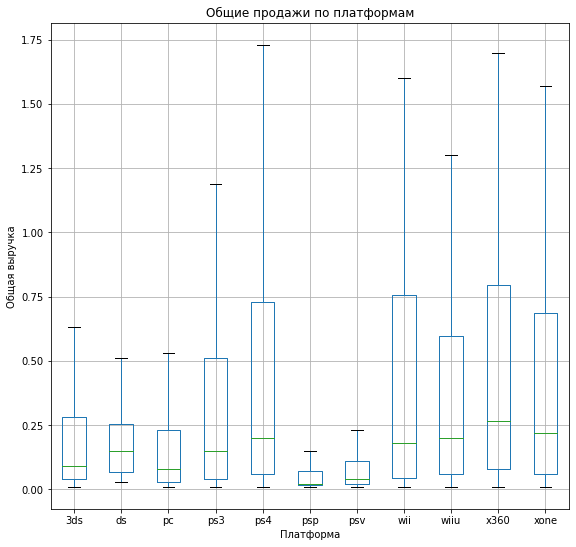

In [35]:
platform_boxplot = data_period.boxplot(figsize=(9,9),column='total_sales',by='platform',showfliers=False)
platform_boxplot_title= 'Общие продажи по платформам'
plt.title(platform_boxplot_title)
plt.suptitle('')
plt.xlabel('Платформа')
plt.ylabel('Общая выручка')
plt.show()

### Влияние отзывов пользователей и критиков на продаже одной конкретной платформы.

Рассмотрим платфоруму _Xone_:

Влияние оценок пользователей:

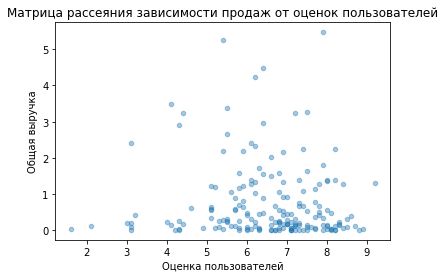

In [36]:
data_period[data_period['platform'] == 'xone']\
.plot(y='total_sales',x='user_score',kind='scatter',alpha=0.4,title='Матрица рассеяния зависимости продаж от оценок пользователей');
plt.xlabel('Оценка пользователей')
plt.ylabel('Общая выручка')
plt.show()

In [37]:
data_period['user_score'].corr(data_period['total_sales'])

-0.0026078133545982744

Влияние оценок пользователей:

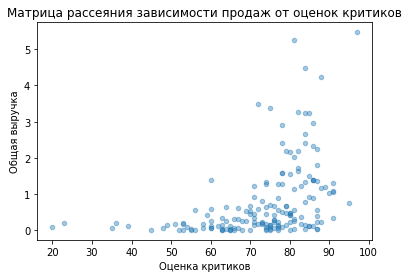

In [38]:
data_period[data_period['platform'] == 'xone']\
.plot(y='total_sales',x='critic_score',kind='scatter',alpha=0.4,title='Матрица рассеяния зависимости продаж от оценок критиков');
plt.xlabel('Оценка критиков')
plt.ylabel('Общая выручка')
plt.show()


In [39]:
data_period['critic_score'].corr(data_period['total_sales'])

0.3136995151027371

___Вывод___:  Мы не видим корреляции в зависимости продаж от оценок пользователей. Оценки критиков влияют чуть больше в сторону увеличения но тоже весьма слабо.

### Влияние отзывов пользователей и критиков на продажи для других платформ

#### Влияние оценок пользователей

In [40]:
x1 = data_period[data_period['platform'] == 'ps3']['user_score']
y1 = data_period[data_period['platform'] == 'ps3']['total_sales']

x2 = data_period[data_period['platform'] == 'ps4']['user_score']
y2 = data_period[data_period['platform'] == 'ps4']['total_sales']

x3 = data_period[data_period['platform'] == '3ds']['user_score']
y3 = data_period[data_period['platform'] == '3ds']['total_sales']

x4 = data_period[data_period['platform'] == 'pc']['user_score']
y4 = data_period[data_period['platform'] == 'pc']['total_sales']

x5 = data_period[data_period['platform'] == 'x360']['user_score']
y5 = data_period[data_period['platform'] == 'x360']['total_sales']

x6 = data_period[data_period['platform'] == 'wiiu']['user_score']
y6 = data_period[data_period['platform'] == 'wiiu']['total_sales']


Text(0.5, 1.0, 'Влияние оценок пользователей на продажи для wiiu')

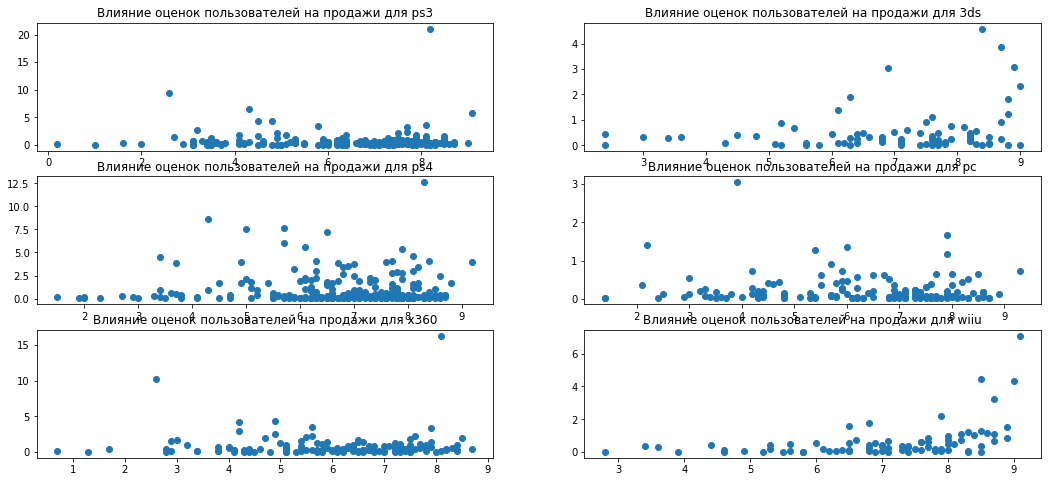

In [41]:
fig, axs = plt.subplots(3, 2,figsize=(18,8))

axs[0, 0].scatter(x1, y1)
axs[0, 0].set_title('Влияние оценок пользователей на продажи для ps3')
axs[1, 0].scatter(x2, y2)
axs[1, 0].set_title('Влияние оценок пользователей на продажи для ps4')
axs[0, 1].scatter(x3, y3)
axs[0, 1].set_title('Влияние оценок пользователей на продажи для 3ds')
axs[1, 1].scatter(x4, y4)
axs[1, 1].set_title('Влияние оценок пользователей на продажи для pc')
axs[2, 0].scatter(x5, y5)
axs[2, 0].set_title('Влияние оценок пользователей на продажи для x360')
axs[2, 1].scatter(x6, y6)
axs[2, 1].set_title('Влияние оценок пользователей на продажи для wiiu')

In [42]:
u1 = data_period.query('platform == "ps3"')['user_score'].corr(data_period['total_sales'])
u2 = data_period.query('platform == "ps4"')['user_score'].corr(data_period['total_sales'])
u3 = data_period.query('platform == "3ds"')['user_score'].corr(data_period['total_sales'])
u4 = data_period.query('platform == "pc"')['user_score'].corr(data_period['total_sales'])
u5 = data_period.query('platform == "x360"')['user_score'].corr(data_period['total_sales'])
u6 = data_period.query('platform == "wiiu"')['user_score'].corr(data_period['total_sales'])

print('Коэффициент корреляции оценок пользователя и общих продаж для ps3',u1)
print('Коэффициент корреляции оценок пользователя и общих продаж для ps4',u2)
print('Коэффициент корреляции оценок пользователя и общих продаж для 3ds',u3)
print('Коэффициент корреляции оценок пользователя и общих продаж для ds',u4)
print('Коэффициент корреляции оценок пользователя и общих продаж для x360',u5)
print('Коэффициент корреляции оценок пользователя и общих продаж для wiiu',u6)

Коэффициент корреляции оценок пользователя и общих продаж для ps3 0.0023944027357566925
Коэффициент корреляции оценок пользователя и общих продаж для ps4 -0.031957110204556376
Коэффициент корреляции оценок пользователя и общих продаж для 3ds 0.24150411773563016
Коэффициент корреляции оценок пользователя и общих продаж для ds -0.0938418695247674
Коэффициент корреляции оценок пользователя и общих продаж для x360 -0.011742185147181342
Коэффициент корреляции оценок пользователя и общих продаж для wiiu 0.4193304819266187


#### Влияние оценок критиков 

In [43]:
x1 = data_period[data_period['platform'] == 'ps3']['critic_score']
y1 = data_period[data_period['platform'] == 'ps3']['total_sales']

x2 = data_period[data_period['platform'] == 'ps4']['critic_score']
y2 = data_period[data_period['platform'] == 'ps4']['total_sales']

x3 = data_period[data_period['platform'] == '3ds']['critic_score']
y3 = data_period[data_period['platform'] == '3ds']['total_sales']

x4 = data_period[data_period['platform'] == 'pc']['critic_score']
y4 = data_period[data_period['platform'] == 'pc']['total_sales']

x5 = data_period[data_period['platform'] == 'x360']['critic_score']
y5 = data_period[data_period['platform'] == 'x360']['total_sales']

x6 = data_period[data_period['platform'] == 'wiiu']['critic_score']
y6 = data_period[data_period['platform'] == 'wiiu']['total_sales']

Text(0.5, 1.0, 'Влияние оценок критиков на продажи для wiiu')

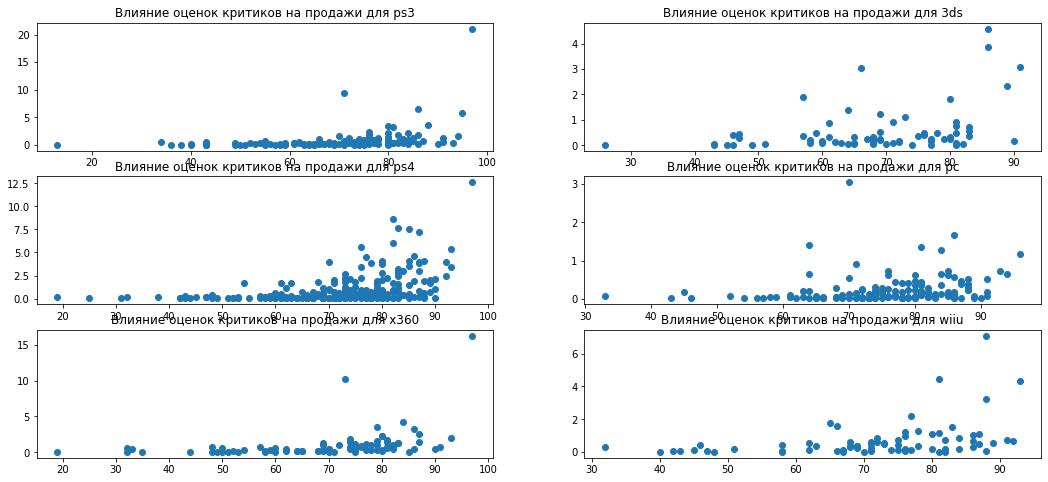

In [44]:
fig, axs = plt.subplots(3, 2,figsize=(18,8))

axs[0, 0].scatter(x1, y1)
axs[0, 0].set_title('Влияние оценок критиков на продажи для ps3')
axs[1, 0].scatter(x2, y2)
axs[1, 0].set_title('Влияние оценок критиков на продажи для ps4')
axs[0, 1].scatter(x3, y3)
axs[0, 1].set_title('Влияние оценок критиков на продажи для 3ds')
axs[1, 1].scatter(x4, y4)
axs[1, 1].set_title('Влияние оценок критиков на продажи для pc')
axs[2, 0].scatter(x5, y5)
axs[2, 0].set_title('Влияние оценок критиков на продажи для x360')
axs[2, 1].scatter(x6, y6)
axs[2, 1].set_title('Влияние оценок критиков на продажи для wiiu')

In [45]:
u1 = data_period.query('platform == "ps3"')['critic_score'].corr(data_period['total_sales'])
u2 = data_period.query('platform == "ps4"')['critic_score'].corr(data_period['total_sales'])
u3 = data_period.query('platform == "3ds"')['critic_score'].corr(data_period['total_sales'])
u4 = data_period.query('platform == "pc"')['critic_score'].corr(data_period['total_sales'])
u5 = data_period.query('platform == "x360"')['critic_score'].corr(data_period['total_sales'])
u6 = data_period.query('platform == "wiiu"')['critic_score'].corr(data_period['total_sales'])

print('Коэффициент корреляции оценок критиков и общих продаж для ps3',u1)
print('Коэффициент корреляции оценок критиков и общих продаж для ps4',u2)
print('Коэффициент корреляции оценок критиков и общих продаж для 3ds',u3)
print('Коэффициент корреляции оценок критиков и общих продаж для pc',u4)
print('Коэффициент корреляции оценок критиков и общих продаж для x360',u5)
print('Коэффициент корреляции оценок критиков и общих продаж для wiiu',u6)

Коэффициент корреляции оценок критиков и общих продаж для ps3 0.3342853393371919
Коэффициент корреляции оценок критиков и общих продаж для ps4 0.40656790206178095
Коэффициент корреляции оценок критиков и общих продаж для 3ds 0.3570566142288103
Коэффициент корреляции оценок критиков и общих продаж для pc 0.19603028294369382
Коэффициент корреляции оценок критиков и общих продаж для x360 0.3503445460228664
Коэффициент корреляции оценок критиков и общих продаж для wiiu 0.3764149065423912


___Вывод___: Можно заметить, что корреляция оценок критиков и продаж ближе к единице но не привышает 0.5. В какой-то степени,положительные оценки критиков хорошо влияют на продажи. Их рецензии издаются на приличных ресурсах. В то же время пользователи это множество самых разных людей и трибуны им как правило никто не предоставляет.

### Прибыльные жанры 

In [46]:
data_period.pivot_table(index='genre',values='total_sales',aggfunc='sum') \
.sort_values(by='total_sales',ascending=False)

,total_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


In [47]:
genre_list = pd.pivot_table(data_period,\
                      index='year_of_release',columns='genre',values='total_sales',aggfunc='sum')

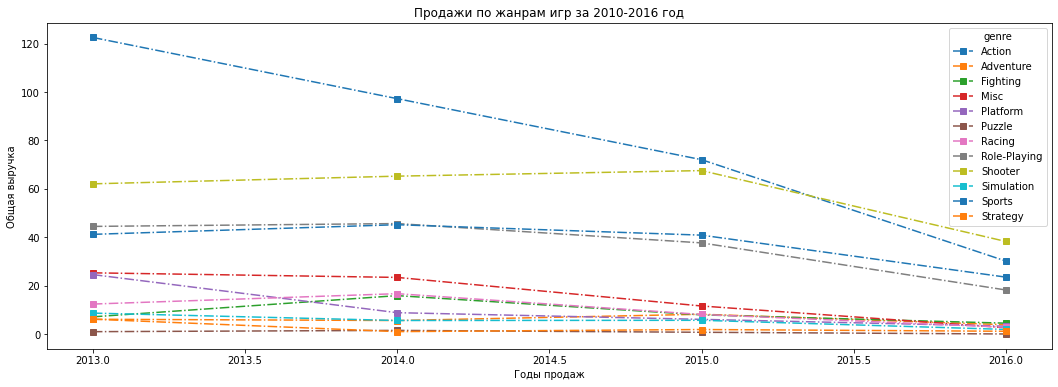

In [48]:
genre_list.plot(figsize=(18,6),ls = '-.',marker='s');
plt.title('Продажи по жанрам игр за 2010-2016 год')
plt.xlabel('Годы продаж')
plt.ylabel('Общая выручка')
plt.show()

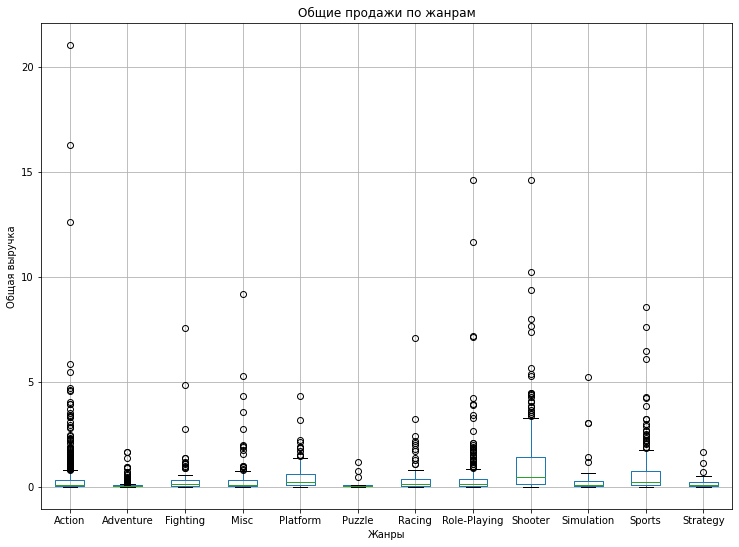

In [49]:
genre_box = data_period.boxplot(figsize=(12,9),column='total_sales',by='genre')
platform_boxplot_title= 'Общие продажи по жанрам'
plt.title(platform_boxplot_title)
plt.suptitle('')
plt.xlabel('Жанры')
plt.ylabel('Общая выручка')

plt.show()

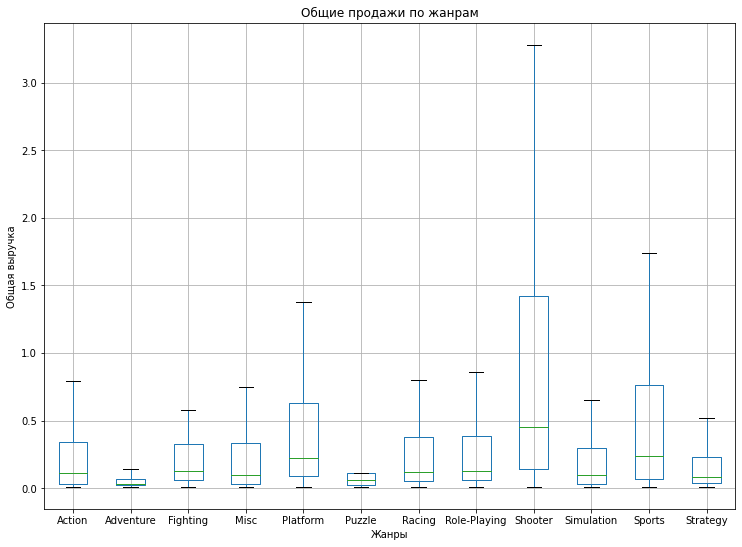

In [50]:
genre_box = data_period.boxplot(figsize=(12,9),column='total_sales',by='genre',showfliers=False)
platform_boxplot_title= 'Общие продажи по жанрам'
plt.title(platform_boxplot_title)
plt.suptitle('')
plt.xlabel('Жанры')
plt.ylabel('Общая выручка')
plt.show()

___Вывод___: Можно заметить что жанры Action и Shooter являются самыми прибыльными. С годами продажи немного снижаются, но лидирущие позиции сохраняются.

___Вывод___: В ходе исследования были выделены актуальные платформы и жанры. Изучено влияние отзывов пользователей и критиков на продажи.

## Составление портретов пользователей

### Европейский регион

#### Самые популярные платформы

In [51]:
europe_platform = data_period.pivot_table(index='platform',values=('eu_sales','total_sales'),aggfunc='sum') \
.sort_values(by='eu_sales',ascending=False).head(5)

In [52]:
europe_platform['Доля продаж'] = europe_platform['eu_sales'] / europe_platform['total_sales']
europe_platform

,eu_sales,total_sales,Доля продаж
platform,,,
ps4,141.09,314.14,0.449131
ps3,67.81,181.43,0.373753
xone,51.59,159.32,0.323814
x360,42.52,136.80,0.310819
3ds,30.96,143.25,0.216126


#### Самые популярные жанры

In [53]:
europe_genre = data_period.pivot_table(index='genre',values=('eu_sales','total_sales'),aggfunc='sum') \
.sort_values(by='eu_sales',ascending=False).head(5)

In [54]:
europe_genre['Доля продаж'] = europe_genre['eu_sales'] / europe_genre['total_sales']
europe_genre

,eu_sales,total_sales,Доля продаж
genre,,,
Action,118.13,321.87,0.367012
Shooter,87.86,232.98,0.377114
Sports,60.52,150.65,0.401726
Role-Playing,36.97,145.89,0.253410
Racing,20.19,39.89,0.506142


#### Влияние рейтинга на продажи

In [55]:
europe_rating = data_period.pivot_table(index='rating',values=('eu_sales','total_sales'),aggfunc='sum') \
.sort_values(by='eu_sales',ascending=False)

In [56]:
europe_rating['Доля продаж'] = europe_rating['eu_sales'] / europe_rating['total_sales']
europe_rating

,eu_sales,total_sales,Доля продаж
rating,,,
M,145.32,371.68,0.390981
E,83.36,200.16,0.416467
E10+,42.69,115.39,0.369963
T,41.95,126.62,0.331306


___Вывод___: Можно заметить, что в данном регионе по продажам лидирует PS3. Наибольшая доля у продаж у платформы PC. По жанрам в лидерах Action и Shooter.Влияние рейтинга не сильно заметно, учитывая то, что данный рейтинг преимцщенственно используется в Северной Америке.

### Северноамериканский регион

#### Самые популярные платформы

In [57]:
na_platform = data_period.pivot_table(index='platform',values=('na_sales','total_sales'),aggfunc='sum') \
.sort_values(by='na_sales',ascending=False).head(5)

In [58]:
na_platform['Доля продаж'] = na_platform['na_sales'] / na_platform['total_sales']
na_platform

,na_sales,total_sales,Доля продаж
platform,,,
ps4,108.74,314.14,0.346151
xone,93.12,159.32,0.584484
x360,81.66,136.80,0.596930
ps3,63.50,181.43,0.349997
3ds,38.20,143.25,0.266667


#### Самые популярные жанры

In [59]:
na_genre = data_period.pivot_table(index='genre',values=('na_sales','total_sales'),aggfunc='sum') \
.sort_values(by='na_sales',ascending=False).head(5)

In [60]:
na_genre['Доля продаж'] = na_genre['na_sales'] / na_genre['total_sales']
na_genre

,na_sales,total_sales,Доля продаж
genre,,,
Action,126.05,321.87,0.391618
Shooter,109.74,232.98,0.471028
Sports,65.27,150.65,0.433256
Role-Playing,46.40,145.89,0.318048
Misc,27.49,62.82,0.437599


#### Влияние рейтинга на продажи

In [61]:
na_rating = data_period.pivot_table(index='rating',values=('na_sales','total_sales'),aggfunc='sum') \
.sort_values(by='na_sales',ascending=False)

In [62]:
na_rating['Доля продаж'] = na_rating['na_sales'] / na_rating['total_sales']
na_rating

,na_sales,total_sales,Доля продаж
rating,,,
M,165.21,371.68,0.444495
E,79.05,200.16,0.394934
E10+,54.24,115.39,0.470058
T,49.79,126.62,0.393224


___Вывод___: Самые большие продажи в абсолютном и относительном значении соответсвтуют платформе X360. На этом континенте шутеры в большом почёте. Большая доля продаж приходится на игры смешанных жанров (не попадающие ни под один жанр). По рейтингам доли продаж примерно равны( не считая редких категорий) Лидирует Mature.

###  Японский регион 

#### Самые популярные платформы

In [63]:
jp_platform = data_period.pivot_table(index='platform',values=('jp_sales','total_sales'),aggfunc='sum') \
.sort_values(by='jp_sales',ascending=False).head(5)

In [64]:
jp_platform['Доля продаж'] = jp_platform['jp_sales'] / jp_platform['total_sales']
jp_platform

,jp_sales,total_sales,Доля продаж
platform,,,
3ds,67.81,143.25,0.473368
ps3,23.35,181.43,0.128700
psv,18.59,32.99,0.563504
ps4,15.96,314.14,0.050805
wiiu,10.88,64.63,0.168343


#### Самые популярные жанры

In [65]:
jp_genre = data_period.pivot_table(index='genre',values=('jp_sales','total_sales'),aggfunc='sum') \
.sort_values(by='jp_sales',ascending=False).head(5)

In [66]:
jp_genre['Доля продаж'] = jp_genre['jp_sales'] / jp_genre['total_sales']
jp_genre

,jp_sales,total_sales,Доля продаж
genre,,,
Role-Playing,51.04,145.89,0.349853
Action,40.49,321.87,0.125796
Misc,9.20,62.82,0.146450
Fighting,7.65,35.31,0.216653
Shooter,6.61,232.98,0.028372


#### Влияние рейтинга на продажи

In [67]:
jp_rating = data_period.pivot_table(index='rating',values=('jp_sales','total_sales'),aggfunc='sum') \
.sort_values(by='jp_sales',ascending=False)

In [68]:
jp_rating['Доля продаж'] = jp_rating['jp_sales'] / jp_rating['total_sales']
jp_rating

,jp_sales,total_sales,Доля продаж
rating,,,
T,20.59,126.62,0.162613
E,15.14,200.16,0.075639
M,14.11,371.68,0.037963
E10+,5.89,115.39,0.051044


___Вывод___: Про продажам лидирует 3DS. Наибольшая доля продаж соответсвует портативной PSP. Среди жанров лидирует РПГ. По рейтингам также как и в первом случае выводов делать не стоит.

### Визуализация по пункту

Подготовка таблиц

In [69]:
platform_vis= data_period.pivot_table(index='platform',values=('eu_sales','jp_sales', 'na_sales'),aggfunc='sum') 
genre_vis = data_period.pivot_table(index='genre',values=('eu_sales','jp_sales', 'na_sales'),aggfunc='sum') 
rating_vis = data_period.pivot_table(index='rating',values=('eu_sales','jp_sales', 'na_sales'),aggfunc='sum')

In [70]:
platform_vis = platform_vis.reset_index()
genre_vis = genre_vis.reset_index()
rating_vis = rating_vis.reset_index()

In [71]:
platform_vis_eu = platform_vis.sort_values(by='eu_sales',ascending=False)
platform_vis_jp = platform_vis.sort_values(by='jp_sales',ascending=False)
platform_vis_na =platform_vis.sort_values(by='na_sales',ascending=False)

genre_vis_eu = genre_vis.sort_values(by='eu_sales',ascending=False)
genre_vis_jp = genre_vis.sort_values(by='jp_sales',ascending=False)
genre_vis_na = genre_vis.sort_values(by='na_sales',ascending=False)

rating_vis_eu = rating_vis.sort_values(by='eu_sales',ascending=False)
rating_vis_jp = rating_vis.sort_values(by='jp_sales',ascending=False)
rating_vis_na = rating_vis.sort_values(by='na_sales',ascending=False)

In [72]:
platform_vis_other_eu = platform_vis_eu[:5]
platform_vis_other_eu = platform_vis_other_eu.append({'platform': 'Другие', 'eu_sales': platform_vis_eu['eu_sales'].sum()-platform_vis_eu['eu_sales'][:5].sum(),
                  'jp_sales': platform_vis_eu['jp_sales'].sum()-platform_vis_eu['jp_sales'][:5].sum(),
                  'na_sales': platform_vis_eu['na_sales'].sum()-platform_vis_eu['na_sales'][:5].sum()}, ignore_index = True)

platform_vis_other_jp = platform_vis_jp[:5]
platform_vis_other_jp = platform_vis_other_jp.append({'platform': 'Другие', 'eu_sales': platform_vis_jp['eu_sales'].sum()-platform_vis_jp['eu_sales'][:5].sum(),
                  'jp_sales': platform_vis_jp['jp_sales'].sum()-platform_vis_jp['jp_sales'][:5].sum(),
                  'na_sales': platform_vis_jp['na_sales'].sum()-platform_vis_jp['na_sales'][:5].sum()}, ignore_index = True)

platform_vis_other_na = platform_vis_na[:5]
platform_vis_other_na = platform_vis_other_na.append({'platform': 'Другие', 'eu_sales': platform_vis_na['eu_sales'].sum()-platform_vis_na['eu_sales'][:5].sum(),
                  'jp_sales': platform_vis_na['jp_sales'].sum()-platform_vis_na['jp_sales'][:5].sum(),
                  'na_sales': platform_vis_na['na_sales'].sum()-platform_vis_na['na_sales'][:5].sum()}, ignore_index = True)


genre_vis_other_eu = genre_vis_eu[:5]
genre_vis_other_eu = genre_vis_other_eu.append({'genre': 'Другие', 'eu_sales': genre_vis_eu['eu_sales'].sum()-genre_vis_eu['eu_sales'][:5].sum(),
                  'jp_sales': genre_vis_eu['jp_sales'].sum()-genre_vis_eu['jp_sales'][:5].sum(),
                  'na_sales': genre_vis_eu['na_sales'].sum()-genre_vis_eu['na_sales'][:5].sum()}, ignore_index = True)

genre_vis_other_jp = genre_vis_jp[:5]
genre_vis_other_jp = genre_vis_other_jp.append({'genre': 'Другие', 'eu_sales': genre_vis_jp['eu_sales'].sum()-genre_vis_jp['eu_sales'][:5].sum(),
                  'jp_sales': genre_vis_jp['jp_sales'].sum()-genre_vis_jp['jp_sales'][:5].sum(),
                  'na_sales': genre_vis_jp['na_sales'].sum()-genre_vis_jp['na_sales'][:5].sum()}, ignore_index = True)

genre_vis_other_na = genre_vis_na[:5]
genre_vis_other_na = genre_vis_other_na.append({'genre': 'Другие', 'eu_sales': genre_vis_na['eu_sales'].sum()-genre_vis_na['eu_sales'][:5].sum(),
                  'jp_sales': genre_vis_na['jp_sales'].sum()-genre_vis_na['jp_sales'][:5].sum(),
                  'na_sales': genre_vis_na['na_sales'].sum()-genre_vis_na['na_sales'][:5].sum()}, ignore_index = True)

rating_vis_other_eu = rating_vis_eu[:4]
rating_vis_other_eu = rating_vis_other_eu.append({'rating': 'Другие', 'eu_sales': rating_vis_eu['eu_sales'].sum()-rating_vis_eu['eu_sales'][:5].sum(),
                  'jp_sales': rating_vis_eu['jp_sales'].sum()-rating_vis_eu['jp_sales'][:5].sum(),
                  'na_sales': rating_vis_eu['na_sales'].sum()-rating_vis_eu['na_sales'][:5].sum()}, ignore_index = True)

rating_vis_other_jp = rating_vis_jp[:5]
rating_vis_other_jp = rating_vis_other_jp.append({'rating': 'Другие', 'eu_sales': rating_vis_jp['eu_sales'].sum()-rating_vis_jp['eu_sales'][:5].sum(),
                  'jp_sales': rating_vis_jp['jp_sales'].sum()-rating_vis_jp['jp_sales'][:5].sum(),
                  'na_sales': rating_vis_jp['na_sales'].sum()-rating_vis_jp['na_sales'][:5].sum()}, ignore_index = True)

rating_vis_other_na = rating_vis_na[:5]
rating_vis_other_na = rating_vis_other_na.append({'rating': 'Другие', 'eu_sales': rating_vis_na['eu_sales'].sum()-rating_vis_na['eu_sales'][:5].sum(),
                  'jp_sales': rating_vis_na['jp_sales'].sum()-rating_vis_na['jp_sales'][:5].sum(),
                  'na_sales': rating_vis_na['na_sales'].sum()-rating_vis_na['na_sales'][:5].sum()}, ignore_index = True)







Построение графиков

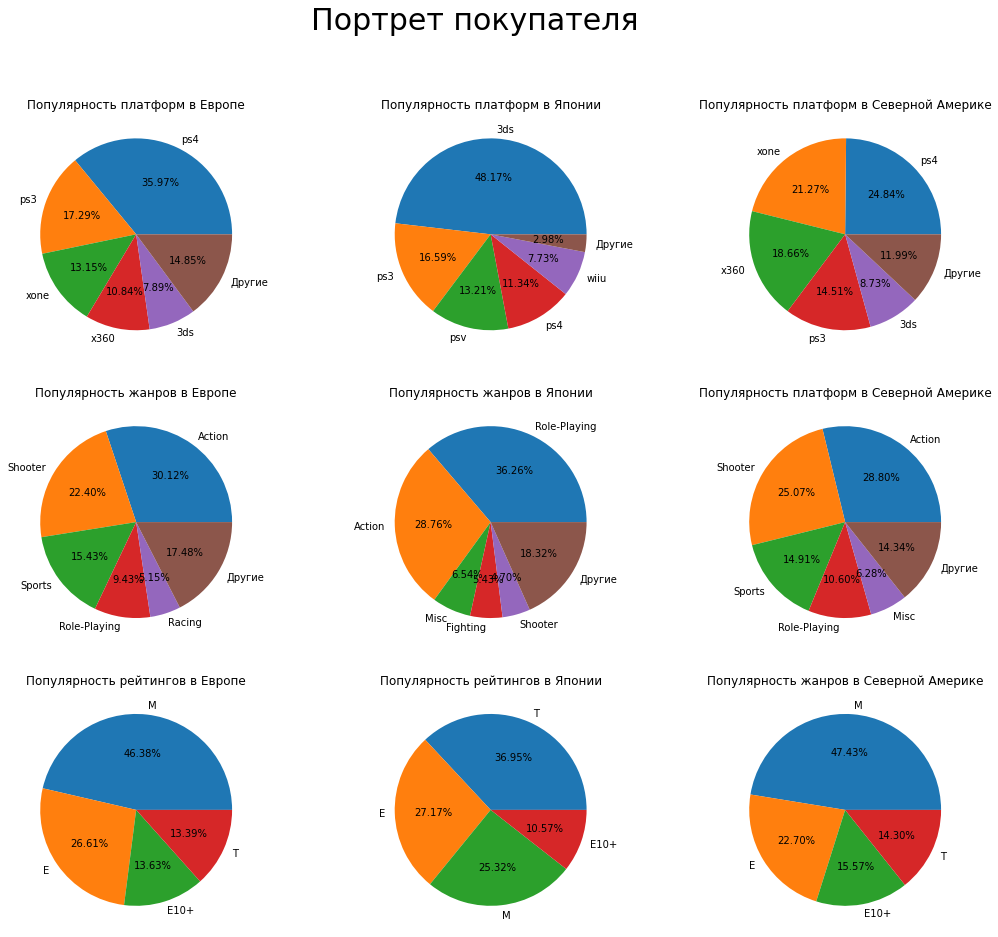

In [73]:
fig, axs = plt.subplots(3, 3,figsize=(18,15))


axs[0, 0].pie(platform_vis_other_eu['eu_sales'], labels=platform_vis_other_eu['platform'],autopct='%1.2f%%')
axs[0, 0].set_title('Популярность платформ в Европе')
axs[1, 0].pie(genre_vis_other_eu['eu_sales'], labels=genre_vis_other_eu['genre'],autopct='%1.2f%%')
axs[1, 0].set_title('Популярность жанров в Европе')
axs[2, 0].pie(rating_vis_eu['eu_sales'], labels=rating_vis_eu['rating'],autopct='%1.2f%%')
axs[2, 0].set_title('Популярность рейтингов в Европе')
axs[0, 1].pie(platform_vis_other_jp['jp_sales'], labels=platform_vis_other_jp['platform'],autopct='%1.2f%%')
axs[0, 1].set_title('Популярность платформ в Японии')
axs[1, 1].pie(genre_vis_other_jp['jp_sales'], labels=genre_vis_other_jp['genre'],autopct='%1.2f%%')
axs[1, 1].set_title('Популярность жанров в Японии')
axs[2, 1].pie(rating_vis_jp['jp_sales'], labels=rating_vis_jp['rating'],autopct='%1.2f%%')
axs[2, 1].set_title('Популярность рейтингов в Японии')
axs[0, 2].pie(platform_vis_other_na['na_sales'], labels=platform_vis_other_na['platform'],autopct='%1.2f%%')
axs[0, 2].set_title('Популярность платформ в Северной Америке')
axs[1, 2].pie(genre_vis_other_na['na_sales'], labels=genre_vis_other_na['genre'],autopct='%1.2f%%')
axs[1, 2].set_title('Популярность платформ в Северной Америке')
axs[2, 2].pie(rating_vis_na['na_sales'], labels=rating_vis_na['rating'],autopct='%1.2f%%')
axs[2, 2].set_title('Популярность жанров в Северной Америке')

fig.suptitle('Портрет покупателя', fontsize=30)

plt.show()


## Проверка гипотез

### Проверка гипотезы : "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

Проверка длин интересующих нас массивов:

In [76]:
print(data_period[data_period['platform'] == 'xone'].shape[0])
print(data_period[data_period['platform'] == 'pc'].shape[0])

247
189


___Формулируем гипотезы___: Нулевая гипотеза: Средние равны. Альтернативная гипотеза: Средние не равны.

In [77]:
alpha = 0.05 
a = data_period[data_period['platform'] == 'xone'].head(189)
b = data_period[data_period['platform'] == 'pc'].head(189)
a=a.dropna(subset=['user_score'])
b=b.dropna(subset=['user_score'])

results = st.ttest_ind(a['user_score'],b['user_score'])

print('p-значение:',results.pvalue )

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу о равенстве')
else:
    print('Не отвергаем нулевую гипотезу')


p-значение: 0.2040268997828712
Не отвергаем нулевую гипотезу


In [79]:
a['user_score'].mean()

6.498620689655172

In [80]:
b['user_score'].mean()

6.2696774193548395

### Проверка гипотезы: "Средние пользовательские рейтинги жанров Action и Sports разные"

___Формулировка гипотезы___: Нулева гипотеза: средние пользовательские рейтинги жанров равны. Альтернативная гипотеза: средние пользовательские рейтинги жанров  не равны.

In [81]:
alpha = 0.05
c = data_period[data_period['genre'] == 'Action']
d = data_period[data_period['genre'] == 'Sports']
c=c.dropna(subset=['user_score'])
d=d.dropna(subset=['user_score'])


results = st.ttest_ind(c['user_score'],d['user_score'])
print('p-значение:',results.pvalue )

if results.pvalue > alpha:
    print('Средние пользовательские рейтинги жанров равны')
else:
    print('Средние пользовательские рейтинги жанров не равны.')


p-значение: 1.0517832389140023e-27
Средние пользовательские рейтинги жанров не равны.


In [82]:
c['user_score'].mean()

6.837532133676092

In [83]:
d['user_score'].mean()

5.238124999999999

___Пояснение___: Два задание гипотезы предлагают проверить обратные явления (что равны и что не равны). Считаю разумным использовать одинаковый механизм, но с перестановкой гипотез( в первом случае нулевая гипотеза - что значения не равны, а во втором что равны). Критерий альфа взят разный для обеих пунктов на основе средних значений из столбцов. В пункте 5.2 средние слишком сильно отличаются.

## Общий вывод

___Вывод из проделанной работы___: Изначально был дан датасет представляющий собой статистику о продажах и рейтингах игр на различных платформах. Проведена предобработка данных включающая в себя редактирования наименований стобцов,удаление пропусков,изменения типов данных в стобцах. Посчитаны суммарные продажи для каждого продукта. Был выбран актуальный период, по которому проводился исследовательский анализ.Выделены самые популярные платформы и жанры (PS4,Xone).Среди жанров лидируют Action и Shooter (зависит от региона). Проведена оценка влияния отзывов пользователей и критиков (оценки критиков влияют сильнее).
По итогам исследования составлены портреты пользователей в зависимости от региона. Проверены выдвигаемые гипотезы.